In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inputImage = cv2.imread("../images/ex01.jpg")
# inputImageGray = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(inputImageGray,5,50,apertureSize = 3, L2gradient = False)
# plt.figure(figsize=(17, 10))
# # plt.subplot(1, 3, 1)
# plt.imshow(inputImage)
# plt.show()
# # plt.subplot(1, 3, 2)
# plt.figure(figsize=(17, 10))
# plt.imshow(inputImageGray)
# plt.show()
# # plt.subplot(1, 3, 3)
# plt.figure(figsize=(17, 10))
# plt.imshow(edges)
# plt.show()

# # plt.subplot(1, 2, 2)
# # minLineLength = 30 # 30
# # maxLineGap = 5 # 5
# # threshold = 30 # 30
# # lines = cv2.HoughLinesP(edges,cv2.HOUGH_PROBABILISTIC, np.pi/180, threshold, minLineLength,maxLineGap)
# # output = inputImage
# # # print(output.shape)
# # for x in range(0, len(lines)):
# #     for x1,y1,x2,y2 in lines[x]:
# #         #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
# #         pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
# # #         output += cv2.polylines(inputImage, [pts], True, (0,255,0))
# #         plt.plot([x1, x2], [y1, y2], 'r')

# # plt.imshow(output)

# plt.show()

# # font = cv2.FONT_HERSHEY_SIMPLEX
# # cv2.putText(inputImage,"Tracks Detected", (500, 250), font, 0.5, 255)
# # cv2.imshow("Trolley_Problem_Result", inputImage)
# # cv2.imshow('edge', edges)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

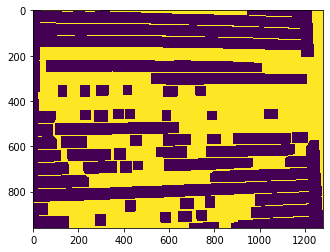

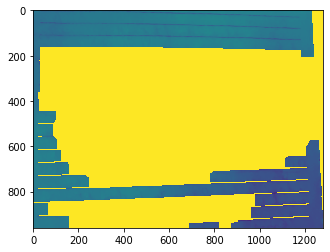

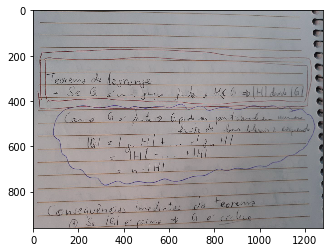

In [36]:
import cv2
import numpy as np
inputImage = cv2.imread("../images/abstract_ex02.jpg")

image = inputImage

blur = cv2.medianBlur(image, 7)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)

canny = cv2.Canny(thresh, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# opening = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel, iterations = 10)
opening = cv2.morphologyEx(255 - thresh, cv2.MORPH_CLOSE, kernel, iterations = 10)
# opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel, iterations = 1)
# dilate = cv2.dilate(opening, kernel, iterations=2)
# dilate = cv2.dilate(255 - thresh, kernel, iterations=10)

cnts = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 100000
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
#         cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
        cv2.drawContours(gray,[c], 0, (255,255,255), -1)
        continue

# cv2.imshow('image', image)
# # cv2.imwrite('image.png', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(opening)
plt.show()
plt.imshow(gray)
plt.show()
plt.imshow(inputImage)
plt.show()

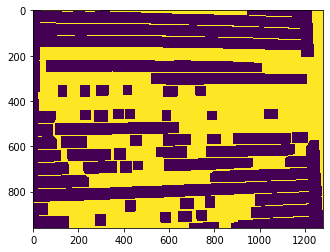

In [35]:
plt.imshow(cv2.morphologyEx(255 - thresh, cv2.MORPH_CLOSE, kernel, iterations = 10))